<center>Проект по курсу "Машинное обучение и анализ данных".</center>
<center>Выполнили студенты групп э521, э522:</center>
<center>Мигранов Ратмир, Мирхалилов Дониёр. </center>
<center>Преподаватель: </center>
<center>Шокуров Антон В.</center>

<center><h1>ПРОЕКТ №2</h1></center>

# Загружаем Библиотеки

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
import pandas as pd
import scipy as sp
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from matplotlib import pylab
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import NMF
from sklearn.decomposition import FactorAnalysis
from sklearn.manifold import TSNE
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import FastICA

# Описание задания


В данных присутствует ряд химических элементов (признаки) и показатель преломления Rl (также признак). Химических элементы входят в состав стекла это железо, кальций, калий и т.д. Так же каждый тип стекла обладает своим показателем преломления. 

Всего 9 признаков (8 химических элементов и один показатель преломления) и 6 классов (типы стекла).

На основе этого возникает следующая задача:

Определить по составу и показателю преломления стекла тип стекла 

# Загружаем Данные 

In [3]:
data = pd.read_csv('glass.csv', delimiter=',', encoding = 'utf-8')
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
Neobrab_data=data.values
Neobrab_data_NoType=Neobrab_data[:,:-1]
Neobrab_data_NoType

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

In [5]:
max=np.max(Neobrab_data)
min=np.min(Neobrab_data)
min,max

(0.0, 75.41)

Выше видно, что данные не одного порядка, некоторые алгоритмы хорошо работают с отмаштабированными данными 

# Масштабирование 

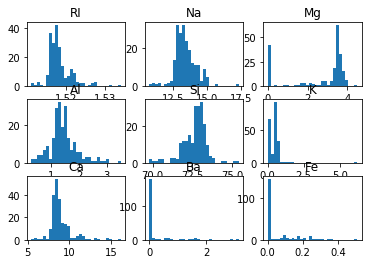

In [6]:
def mashtab (Neobrab_data_NoType,a,b,c,d,data_columns):
    pylab.subplot (a, b, c)
    Neobrab_data_NoType=Neobrab_data_NoType[:, d]
    plt.hist( Neobrab_data_NoType, 30 )
    pylab.title (data_columns)
for i in range(len(data.columns)-1):
    mashtab(Neobrab_data_NoType,3,3,1+i,0+i,data.columns[0+i])

Теоретически можно предположить, что данные распределены нормально, значит можно применить метод стандартизации, но так же применим метод нормализации и метод "RobustScaler", а в будущем проверим на каких данных модели лучше обучаются

Стандартизация

In [35]:
scaler=StandardScaler()
Obrab_data_NoType=scaler.fit(Neobrab_data_NoType)
Stand_data_NoType=scaler.transform(Neobrab_data_NoType)

Нормализация

In [36]:
scaler_1=preprocessing.MinMaxScaler(feature_range=(0,1))
Neobrab_data_NoType_1=scaler_1.fit(Neobrab_data_NoType)
Norm_data_NoType=scaler_1.transform(Neobrab_data_NoType)

Примени ещё RobustScaler, чтобы игнорировать точки данных,
которые сильно отличаются от остальных

In [37]:
scaler_2 = RobustScaler()
Neobrab_data_NoType_2=scaler_2.fit(Neobrab_data_NoType)
Robust_data_NoType=scaler_2.transform(Neobrab_data_NoType)


# Расположение данных 

In [38]:
label=np.unique(data['Type'].values) # шесть уникальных элементов - 1,2,3,5,6,7
y= data.Type.values

In [48]:
sum=0
for i in label:
    print(Neobrab_data_NoType[y==i,0].shape)
    sum+=Neobrab_data_NoType[y==i,0].shape[0]
sum

(70,)
(76,)
(17,)
(13,)
(9,)
(29,)


214

Как мы видим выше к 1 типу принадлжежит 70 строк, 2 - 76, 3 - 17, 5 - 13, 6 - 9, 7 - 29. Всего 214 строки

In [39]:
def Raspl_data (Neobrab_data_NoType,a,b,c, d, f):
    fig = plt.figure(figsize=(8, 8))
    colors = ['navy', 'turquoise', 'darkorange','red','black',
         'green','yellow','purple','grey']
    for color, i, target_name in zip(colors, label, label): 
        plt.scatter(Neobrab_data_NoType[y==i,a],
                    Neobrab_data_NoType[y==i,b], 
                    color=color, alpha=1, lw=5,
                   label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints = 1 )
    plt.axis("equal")
    plt.title(c)
    plt.xlabel(d)
    plt.ylabel(f) 

Как строится график? 

с помощью y==i определяется какие строки данных принадлежат типу i, с помощью переменных a,b устанавливается какие признаки мы хотим использовать при построении графика. Если строится 2d плоскость то используется два признака (столбца). В итоге получается, что к 1 типу принадлжежит 70 точек, 2 - 76, 3 - 17, 5 - 13, 6 - 9, 7 - 29. Всего 214 точек

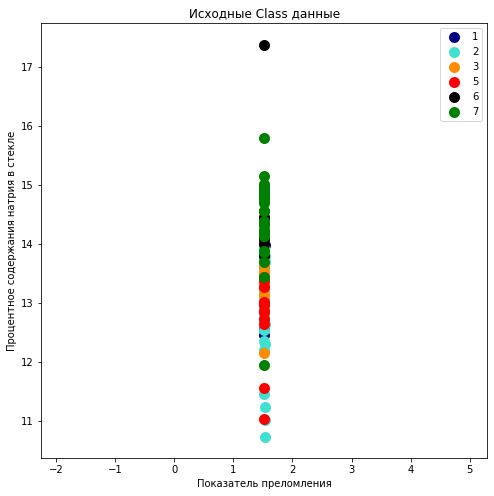

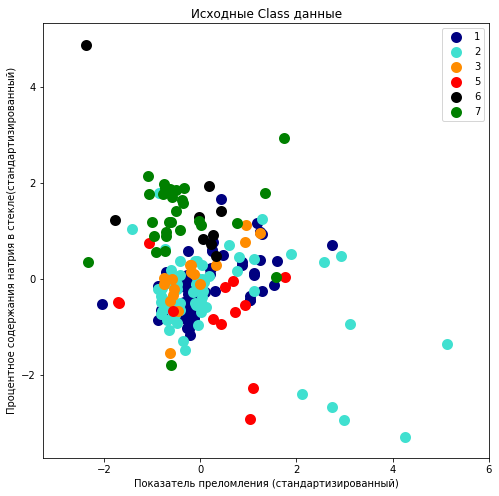

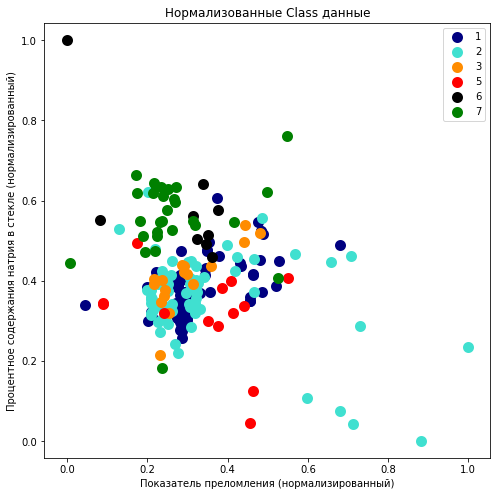

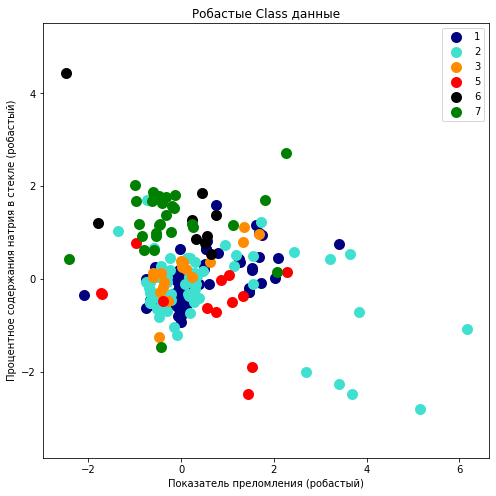

In [21]:
Raspl_data (Neobrab_data_NoType,0,1, "Исходные Class данные", "Показатель преломления", "Процентное содержания натрия в стекле")
Raspl_data(Stand_data_NoType,0,1, "Исходные Class данные", "Показатель преломления (стандартизированный)", "Процентное содержания натрия в стекле(стандартизированный)")
Raspl_data (Norm_data_NoType,0,1, "Нормализованные Class данные", "Показатель преломления (нормализированный)", "Процентное содержания натрия в стекле (нормализированный)")
Raspl_data (Robust_data_NoType,0,1, "Робастые Class данные", "Показатель преломления (робастый)", "Процентное содержания натрия в стекле (робастый)")

Как видно выше, нельзя очевидно разделить данные по классам. По другим проекциям это также не возможно

Применим метод PCA, для того, чтобы разделить данные по классам 

# Метод PCA

In [50]:
def Metod_PCA (Neobrab_data,a):
    pca = PCA(n_components=a, svd_solver='full')
    Introduc_data_pca = pca.fit_transform(Neobrab_data) 
    print(pca.explained_variance_ratio_)
    print(pca.singular_values_)
    return Introduc_data_pca

In [51]:
Introduc_data_pca = Metod_PCA(Neobrab_data_NoType,9)
Norm_data_pca = Metod_PCA(Norm_data_NoType,9)
Stand_data_pca = Metod_PCA(Stand_data_NoType,9)
Robust_data_pca = Metod_PCA(Robust_data_NoType,9)

[4.76205247e-01 2.63192760e-01 1.07800432e-01 1.02024637e-01
 3.30672372e-02 1.60477360e-02 1.42743130e-03 2.34365001e-04
 1.53917702e-07]
[2.52869126e+01 1.87990408e+01 1.20312007e+01 1.17044564e+01
 6.66342748e+00 4.64200502e+00 1.38444698e+00 5.60977056e-01
 1.43761635e-02]
[4.54295689e-01 1.79900973e-01 1.26494594e-01 9.79784747e-02
 6.86239844e-02 4.21410072e-02 2.60979021e-02 4.32796192e-03
 1.39413736e-04]
[5.1049308  3.21245688 2.69374532 2.3707507  1.98407697 1.55479454
 1.22355459 0.49826716 0.08942796]
[2.79018192e-01 2.27785798e-01 1.56093777e-01 1.28651383e-01
 1.01555805e-01 5.86261325e-02 4.09953826e-02 7.09477197e-03
 1.78757536e-04]
[23.18165303 20.94553527 17.33887582 15.74111062 13.98558118 10.62609671
  8.88578116  3.69655662  0.58675976]
[3.84958760e-01 1.86380690e-01 1.69922187e-01 1.02268553e-01
 8.44030338e-02 4.48811209e-02 2.01397584e-02 6.88496317e-03
 1.60934523e-04]
[29.46361639 20.5012058  19.57510013 15.18623106 13.79615219 10.06029684
  6.7391648   3.940

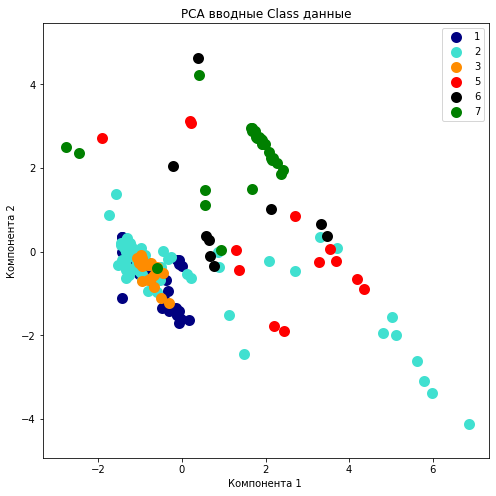

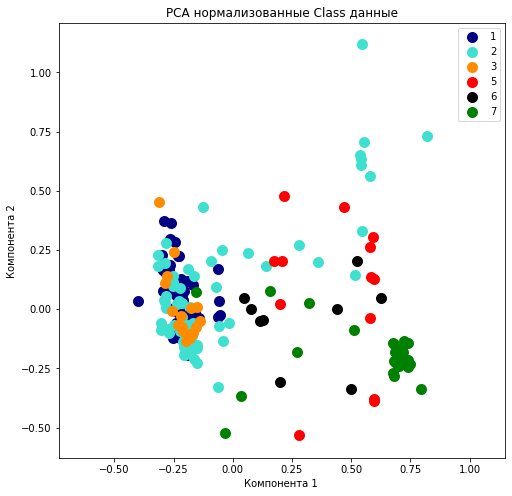

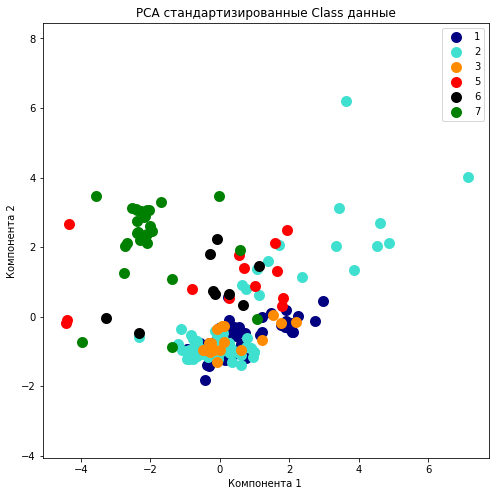

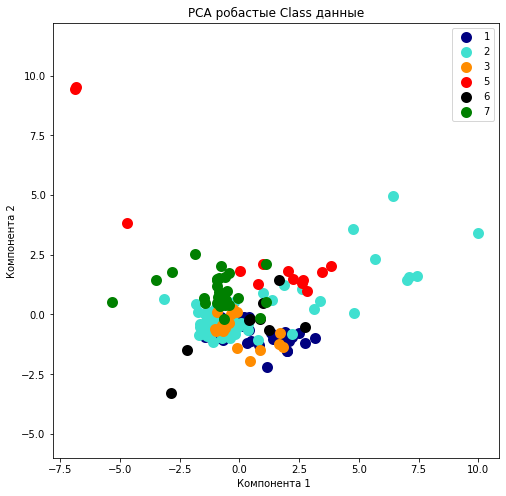

In [74]:
Raspl_data (Introduc_data_pca,0,1, "РСА вводные Class данные", "Компонента 1 ", "Компонента 2")
Raspl_data (Norm_data_pca,0,1,"РСА нормализованные Class данные", "Компонента 1 ", "Компонента 2")
Raspl_data (Stand_data_pca,0,1,"РСА стандартизированные Class данные", "Компонента 1 ", "Компонента 2")
Raspl_data (Robust_data_pca,0,1, "РСА робастые Class данные", "Компонента 1 ", "Компонента 2")

Как видно выше, получилось отделить класс 7 и где-то класс 6 

Посторим 3D проекцию и посмотрим, что вышло 

In [14]:
import matplotlib.cm as cmap

In [67]:
def threeD_data (Neobrab_data_NoType, a,b,c,d,f,e, g, k, o ):
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=a, azim=b)
    colors = ['navy', 'turquoise', 'darkorange','red','black',
         'green','yellow','purple','grey']
    
    for name, label in [('1', 1), ('2', 2), ('3', 3),('5', 5), ('6', 6), ('7', 7)]:
        ax.text3D(Neobrab_data_NoType[y == label, c].mean(),
                  Neobrab_data_NoType[y == label, d].mean() + 1.0,
                  Neobrab_data_NoType[y == label, f].mean(), name,
                  horizontalalignment='center')
    yy = np.choose(data['Type'].values, colors)
    for i in [1,2,3,5,6,7]:
        ax.scatter(Neobrab_data_NoType[y==i,c], 
                   Neobrab_data_NoType[y==i,d], 
                   Neobrab_data_NoType[y==i,f], c=colors[i], s=50, cmap=plt.cm.spring, alpha=1, edgecolor='black')
    ax.set_xlabel(g)
    ax.set_ylabel(k)
    ax.set_zlabel(o)
    plt.title(e)

При построении используется три признака(столбца). Построение аналогично 2d

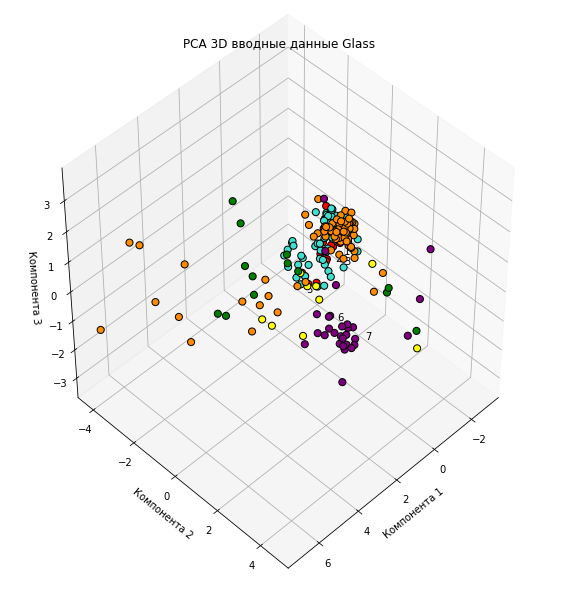

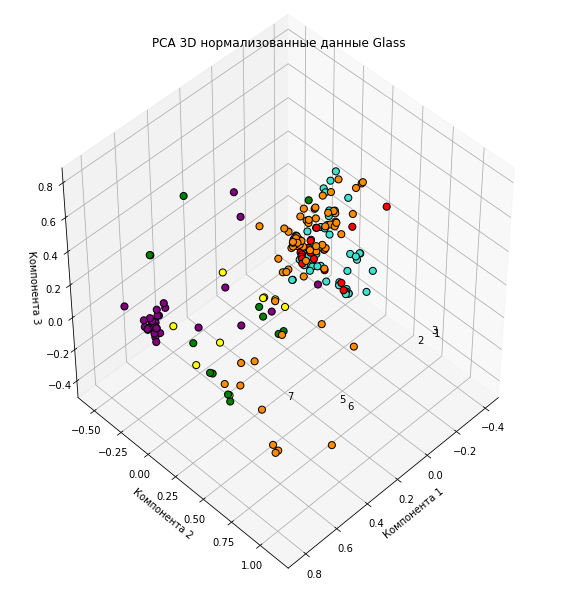

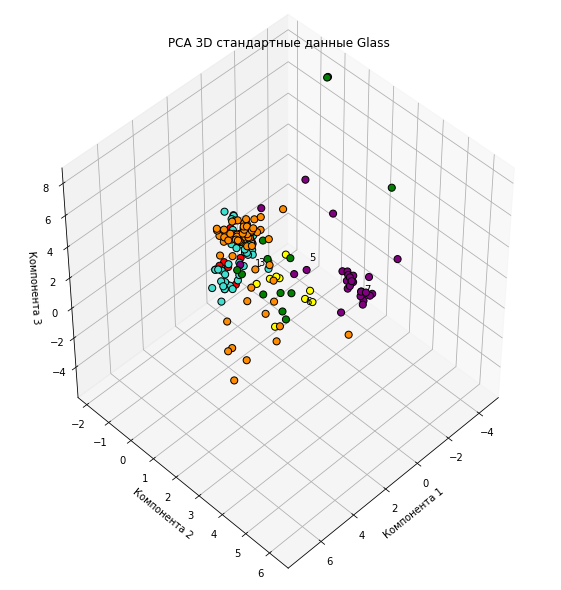

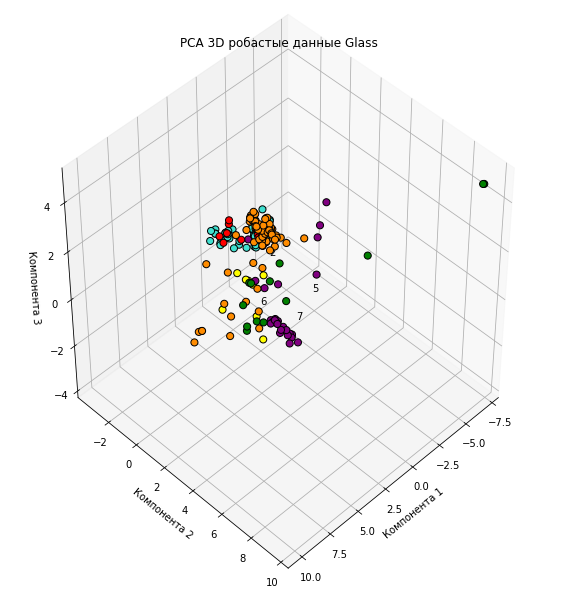

In [69]:
threeD_data (Introduc_data_pca, 45, 45, 0,1,2, "PCA 3D вводные данные Glass ",
             "Компонента 1", "Компонента 2", "Компонента 3")
threeD_data (Norm_data_pca, 45, 45, 0,1,2, "PCA 3D нормализованные данные Glass ",
             "Компонента 1", "Компонента 2", "Компонента 3")
threeD_data (Stand_data_pca , 45, 45, 0,1,2, "PCA 3D стандартные данные Glass ",
             "Компонента 1", "Компонента 2", "Компонента 3")
threeD_data (Robust_data_pca , 45, 45, 0,1,2, "PCA 3D робастые данные Glass ",
             "Компонента 1", "Компонента 2", "Компонента 3")

Из 3D видно, очевидно, отделилися класс 7, но остальные классы вперемешку. 

Попробуем использовать следующий метод и посмотрим, что получится



# Факторизация неотрицательных матриц (NMF)

Как и в РСА, мы пытаемся записать каждую точку данных в виде взвешенной суммы некоторых компонентов. в NMF нам нужно получить
неотрицательные компоненты и коэффициенты, поэтому этот метод может быть применен только к тем данным, в которых характеристики имеют неотрицательные значения. Процесс разложения данных на неотрицательную взвешенную сумму особенно полезен для данных, созданных в результате объединения нескольких независимых источников

In [75]:
def Metod_NMF (Neobrab_data,a):
    nmf = NMF(n_components=a, random_state=0)
    Introduc_data_nmf = nmf.fit_transform(Neobrab_data) 
    return Introduc_data_nmf

In [76]:
Introduc_data_nmf=Metod_NMF(Neobrab_data_NoType,9)
Norm_data_nmf=Metod_NMF(Norm_data_NoType,9)
#Robust_data_nmf=Metod_NMF(Robust_data_NoType,9)
#Stand_data_nmf=Metod_NMF(Stand_data_NoType,9) 

Stand_data_nmf=Metod_NMF(Stand_data_NoType,9), Robust_data_nmf=Metod_NMF(Robust_data_NoType,9) нельзя применить так как в матрице присутствуют отрицательные знаяения

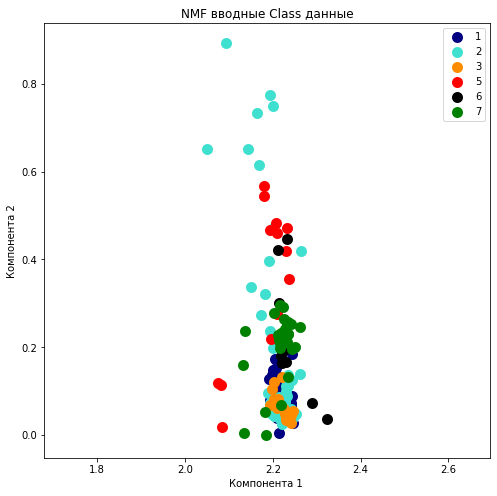

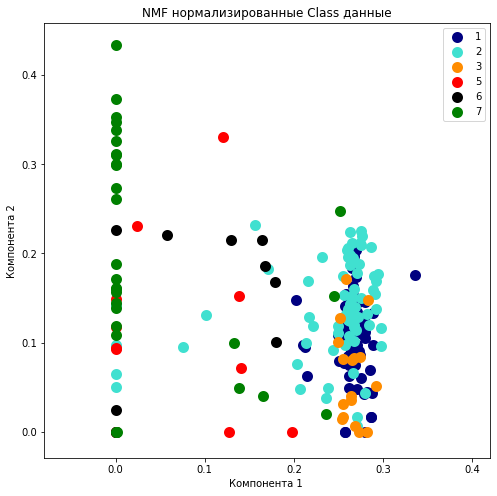

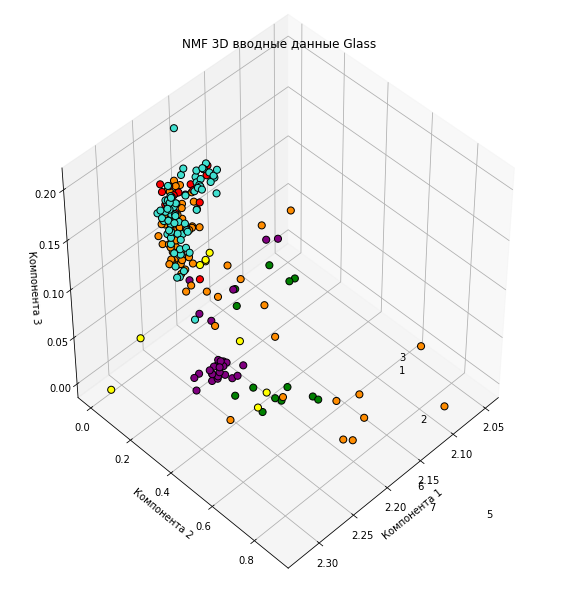

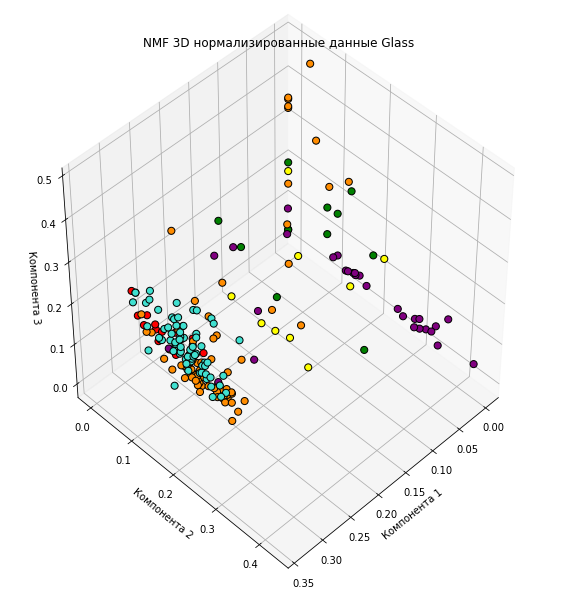

In [77]:
Raspl_data (Introduc_data_nmf,0,1, "NMF вводные Class данные", "Компонента 1 ", "Компонента 2")
Raspl_data (Norm_data_nmf,0,1, "NMF нормализированные Class данные", "Компонента 1 ", "Компонента 2")
threeD_data (Introduc_data_nmf , 45, 45, 0,1,2, "NMF 3D вводные данные Glass ", "Компонента 1 ", "Компонента 2", "Компонента 3")
threeD_data (Norm_data_nmf , 45, 45, 0,1,2, "NMF 3D нормализированные данные Glass ", "Компонента 1 ", "Компонента 2", "Компонента 3")

Мы видим, что так же отделился класс 7, может быть где то класс 2 и 3

Попробуем использовать следующий метод и посмотрим, что получится

# Ослабляем РСА 

Раннее мы считаль, что в РСА шум постоянен по осям, теперь избавимся от этой предпосылки и посмотрим, что получится с данными

In [80]:
from sklearn.decomposition import FactorAnalysis

In [81]:
def Metod_FactorAnalysis (Neobrab_data,a):
    Factor= FactorAnalysis(n_components=a)
    Introduc_data_Factor = Factor.fit_transform(Neobrab_data) 
    return Introduc_data_Factor

In [82]:
Introduc_data_Factor=Metod_FactorAnalysis(Neobrab_data_NoType,9)
Norm_data_Factor=Metod_FactorAnalysis(Norm_data_NoType,9)
Stand_data_Factor=Metod_FactorAnalysis(Stand_data_NoType,9) 
Robust_data_Factor=Metod_FactorAnalysis(Robust_data_NoType,9)

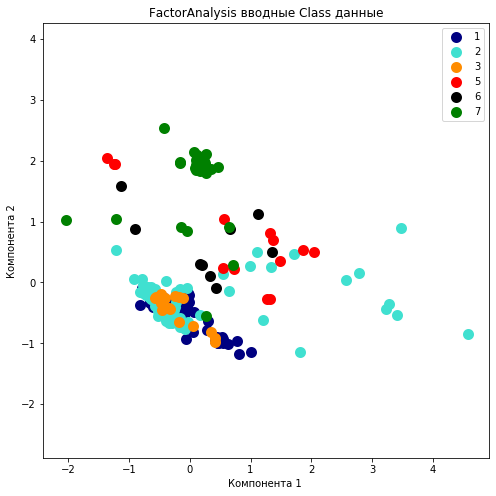

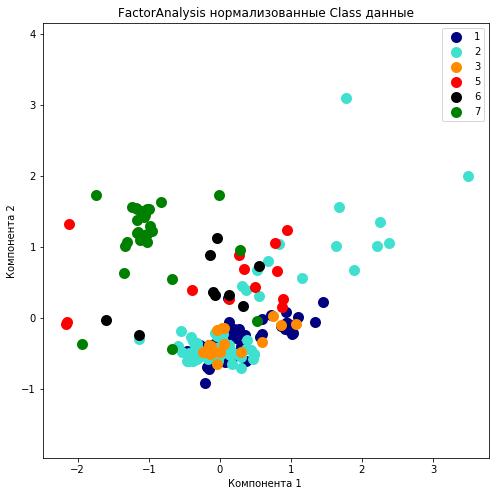

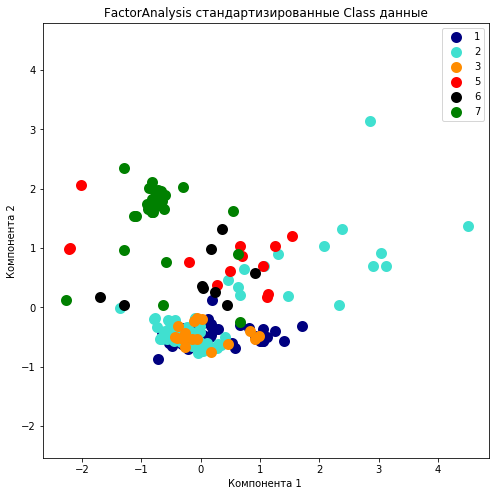

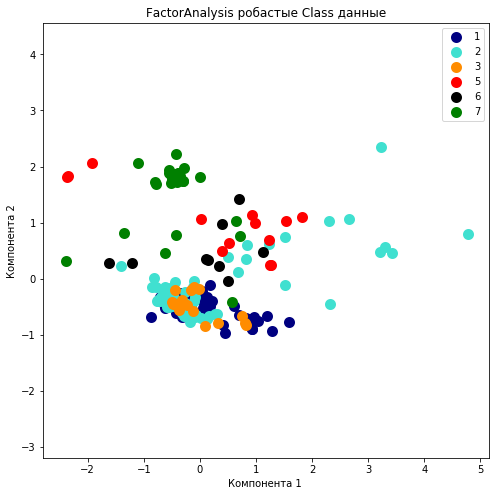

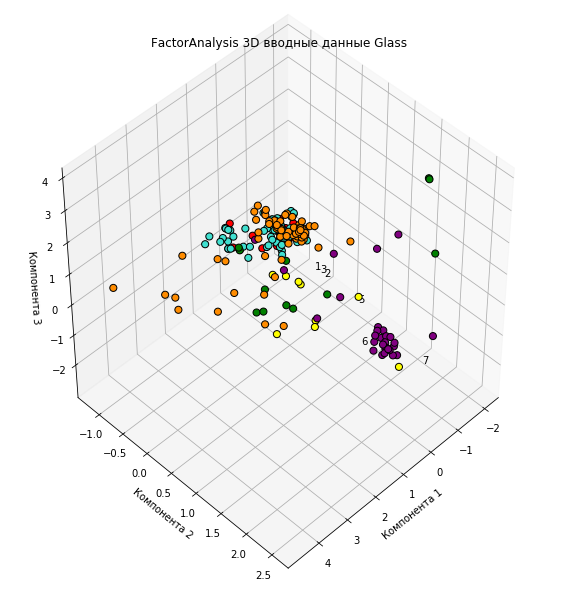

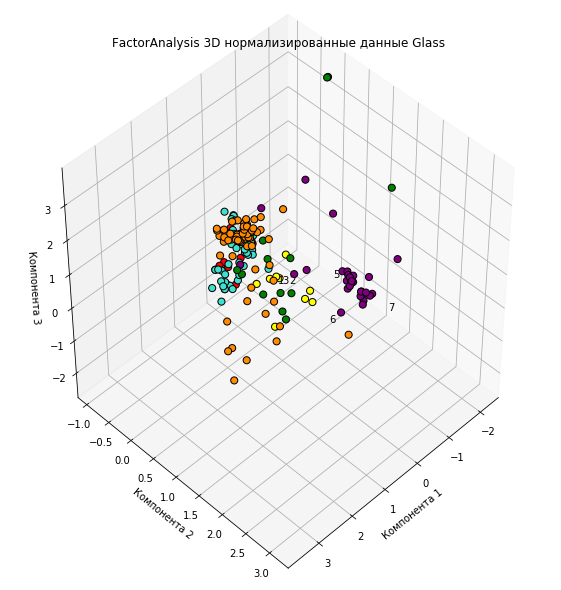

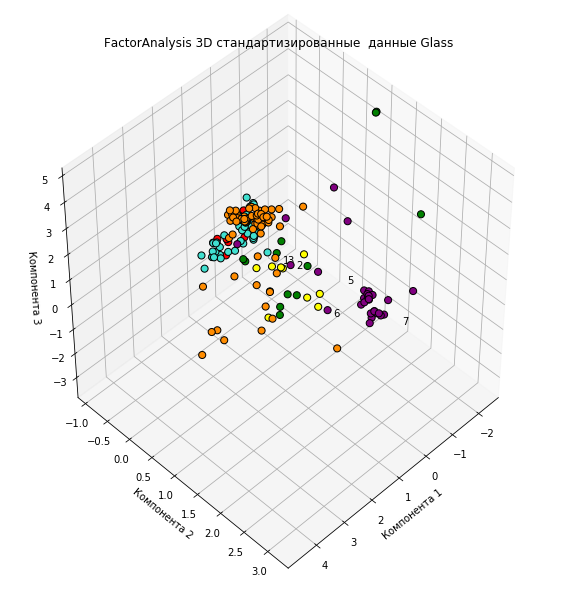

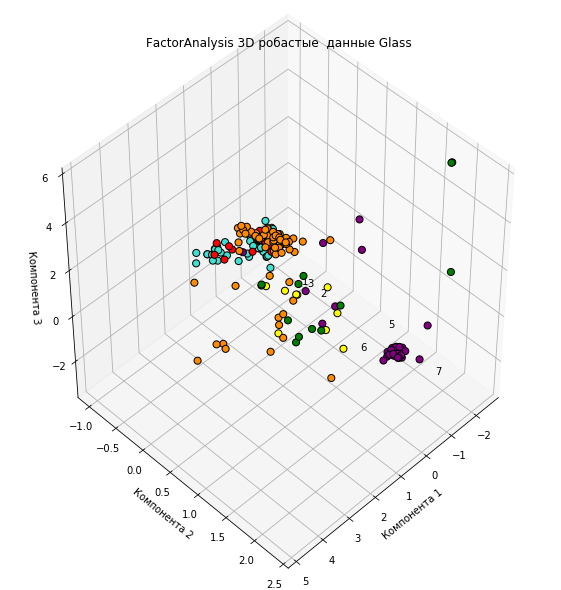

In [84]:
Raspl_data (Introduc_data_Factor,0,1, "FactorAnalysis вводные Class данные","Компонента 1 ", "Компонента 2")
Raspl_data (Norm_data_Factor,0,1, "FactorAnalysis нормализованные Class данные","Компонента 1 ", "Компонента 2")
Raspl_data (Stand_data_Factor,0,1, "FactorAnalysis стандартизированные Class данные","Компонента 1 ", "Компонента 2")
Raspl_data (Robust_data_Factor,0,1, "FactorAnalysis робастые Class данные","Компонента 1 ", "Компонента 2")
threeD_data (Introduc_data_Factor , 45, 45, 0,1,2, "FactorAnalysis 3D вводные данные Glass ","Компонента 1 ", "Компонента 2", "Компонента 3")
threeD_data (Norm_data_Factor , 45, 45, 0,1,2, "FactorAnalysis 3D нормализированные данные Glass ","Компонента 1 ", "Компонента 2", "Компонента 3")
threeD_data (Stand_data_Factor , 45, 45, 0,1,2, "FactorAnalysis 3D стандартизированные  данные Glass ","Компонента 1 ", "Компонента 2", "Компонента 3")
threeD_data (Robust_data_Factor , 45, 45, 0,1,2, "FactorAnalysis 3D робастые  данные Glass ","Компонента 1 ", "Компонента 2", "Компонента 3")

Как видно из графиков, мы опять отделили класс 7 но не смогли отделить остальные классы

Попробуем использовать следующий метод и посмотрим, что получится

<h2>Ядровый Метод Главных Компонент (Kernel PCA)</h2>

Так как данные не разделяются попробуем спроецировать данные на искривленную поверхность

In [87]:
def Metod_KernelPCA (Neobrab_data,a):
    kpc= KernelPCA(n_components=a,kernel='rbf', gamma=0.5)
    Introduc_data_kpc = kpc.fit_transform(Neobrab_data) 
    print(kpc.lambdas_)
    return Introduc_data_kpc

Так же был перепробаванны различные комбинации ("poly", coef0=_, degree=_) 

In [88]:
Introduc_data_kpc=Metod_KernelPCA(Neobrab_data_NoType,9)
Norm_data_kpc=Metod_KernelPCA(Norm_data_NoType,9)
Stand_data_kpc=Metod_KernelPCA(Stand_data_NoType,9)
Robust_data_kpc=Metod_KernelPCA(Robust_data_NoType,9)

[36.8867858  16.80528197 12.01461212  8.61300907  7.11545984  4.84726052
  4.35052412  4.29772538  3.72356096]
[18.71331066  6.43452097  5.34780005  3.64702877  2.50090134  1.71257083
  1.42755011  0.8452503   0.67184179]
[28.49032201 11.97478071 10.66113285  8.15668321  6.94235133  5.49768131
  5.40788827  4.96879947  4.52461359]
[26.98656587 11.04315938 10.22744762  8.86410796  7.55785907  5.2046381
  5.00879287  4.61543874  4.37327374]


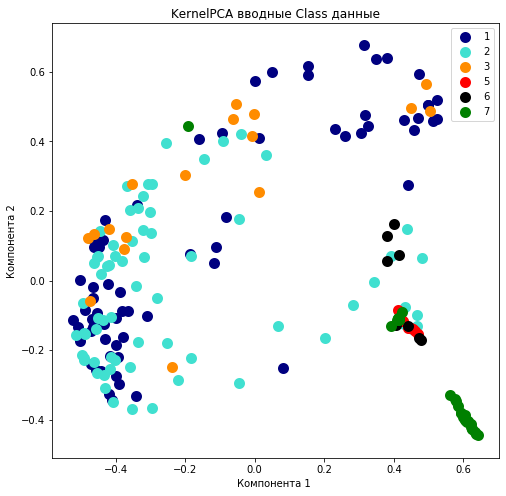

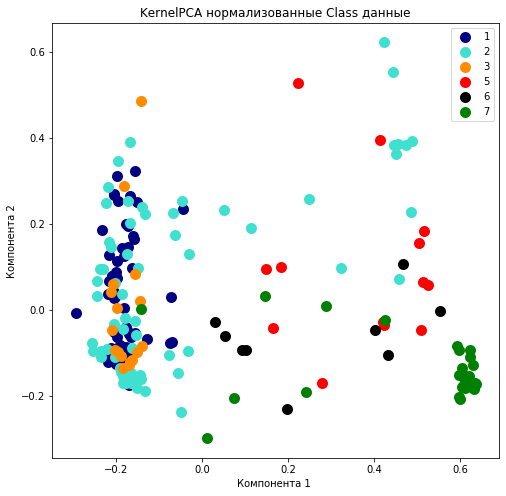

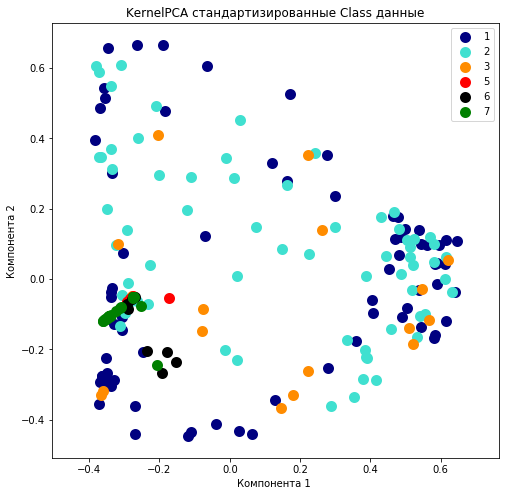

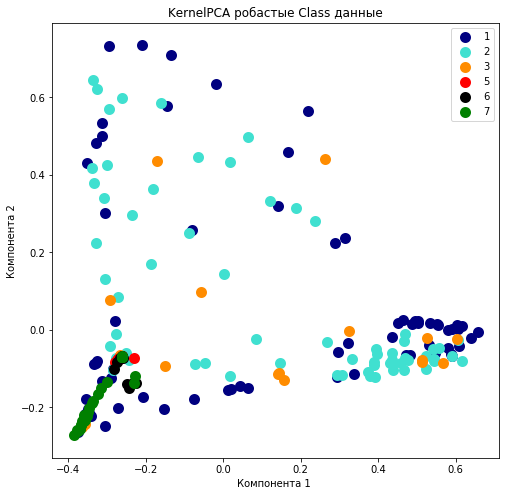

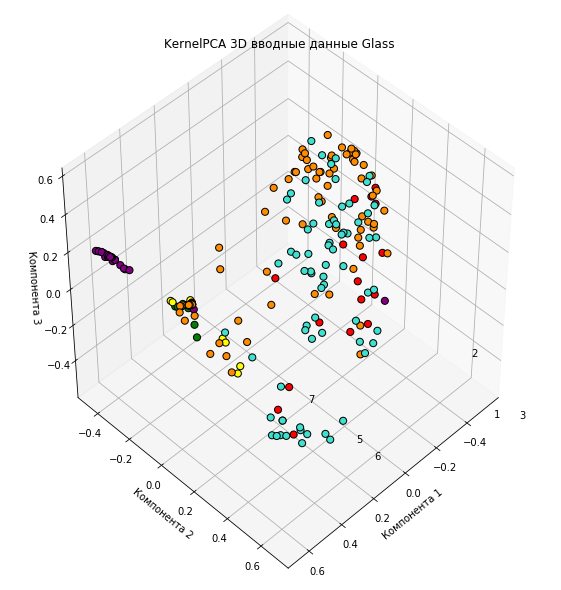

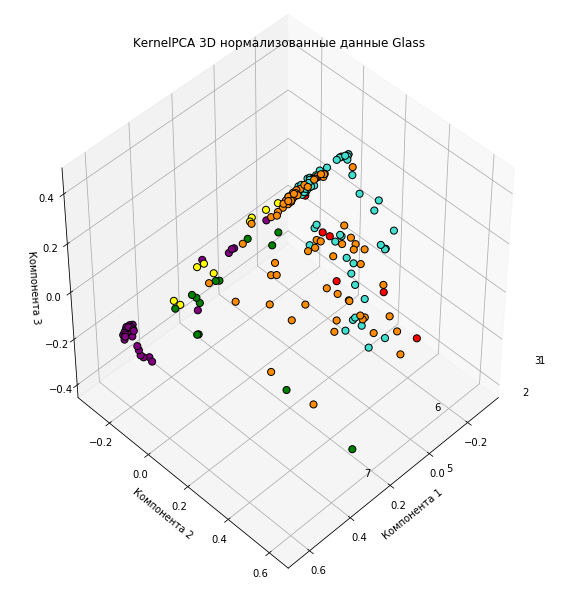

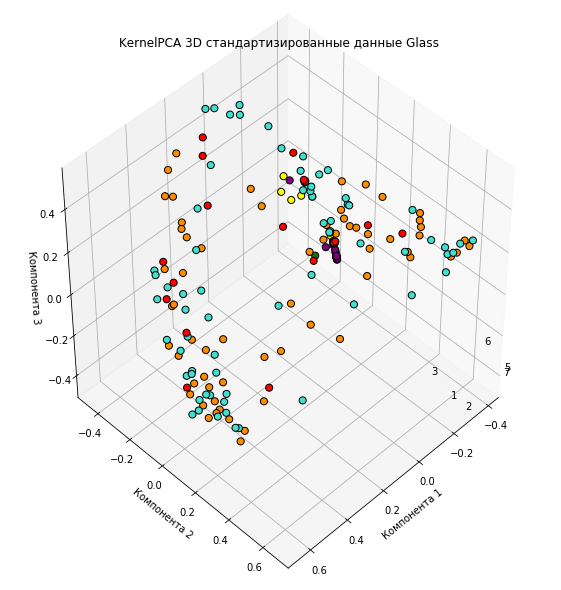

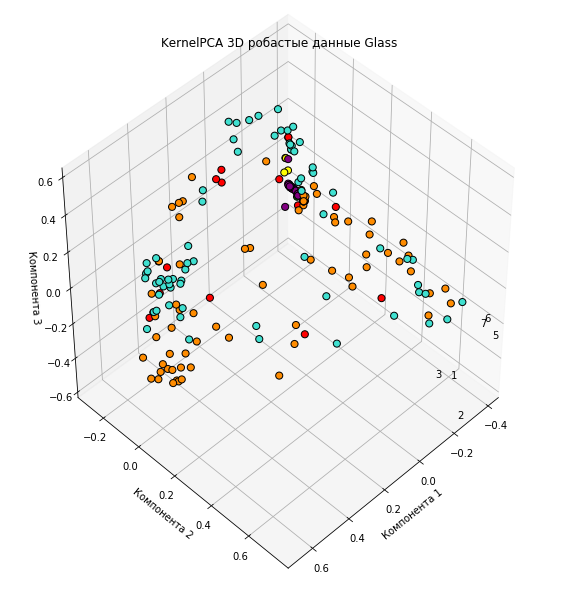

In [89]:
Raspl_data (Introduc_data_kpc,0,1, "KernelPCA вводные Class данные", "Компонента 1 ", "Компонента 2")
Raspl_data (Norm_data_kpc,0,1, "KernelPCA нормализованные Class данные", "Компонента 1 ", "Компонента 2")
Raspl_data (Stand_data_kpc,0,1, "KernelPCA стандартизированные Class данные", "Компонента 1 ", "Компонента 2")
Raspl_data (Robust_data_kpc,0,1, "KernelPCA робастые Class данные", "Компонента 1 ", "Компонента 2")
threeD_data (Introduc_data_kpc , 45, 45, 0,1,2, "KernelPCA 3D вводные данные Glass ","Компонента 1 ", "Компонента 2", "Компонента 3")
threeD_data (Norm_data_kpc , 45, 45, 0,1,2, "KernelPCA 3D нормализованные данные Glass ","Компонента 1 ", "Компонента 2", "Компонента 3")
threeD_data (Stand_data_kpc , 45, 45, 0,1,2, "KernelPCA 3D стандартизированные данные Glass ","Компонента 1 ", "Компонента 2", "Компонента 3")
threeD_data (Robust_data_kpc , 45, 45, 0,1,2, "KernelPCA 3D робастые данные Glass ","Компонента 1 ", "Компонента 2", "Компонента 3")

Опять таки отделили только класс семь, но разброс данных увеличился, поэтому возможно моделям машшиного обучения будет легче отделять одни данные от других

Попробуем использовать следующий метод и посмотрим, что получится

# Общий случай метода главных компонент

Это алгоритм, который находит направления в пространстве признаков, соответствующие проекциям с высокой негауссовостью. Скорее всего этот метод нам ничего не даст, так как многие данные из нашего dataset распределены нормально, но почему бы не проверить

In [90]:
def Metod_FastICA (Neobrab_data,a):
    ica= FastICA(n_components=a,algorithm='deflation',random_state=0)
    Introduc_data_ica = ica.fit_transform(Neobrab_data) 
    return Introduc_data_ica

In [91]:
Introduc_data_ica=Metod_FastICA(Neobrab_data_NoType,9)
Norm_data_ica=Metod_FastICA(Norm_data_NoType,9)
Stand_data_ica=Metod_FastICA(Stand_data_NoType,9)
Robust_data_ica=Metod_FastICA(Robust_data_NoType,9)

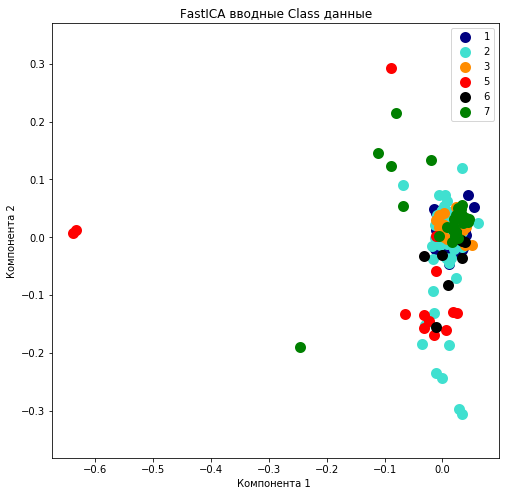

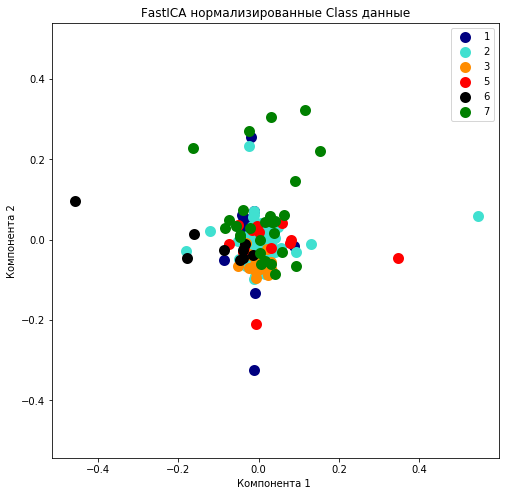

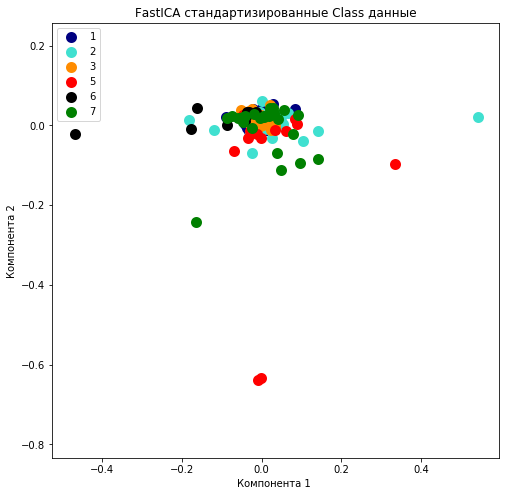

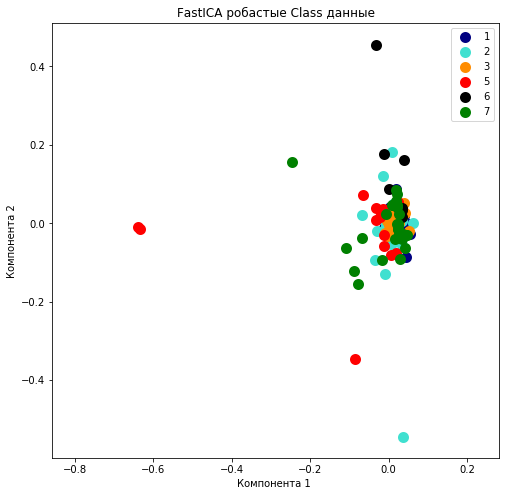

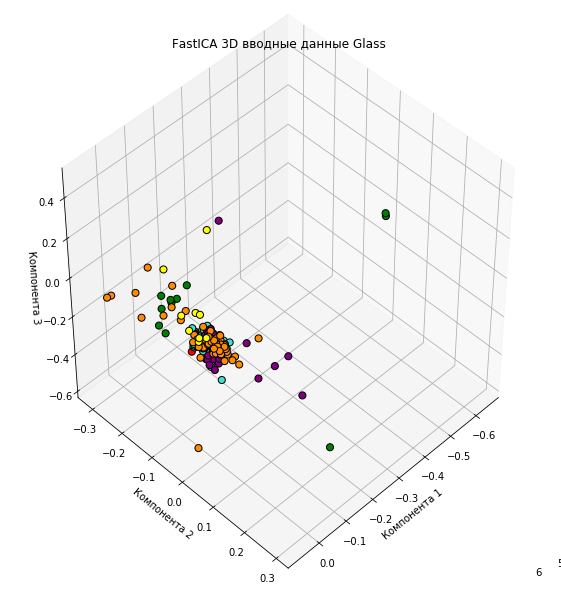

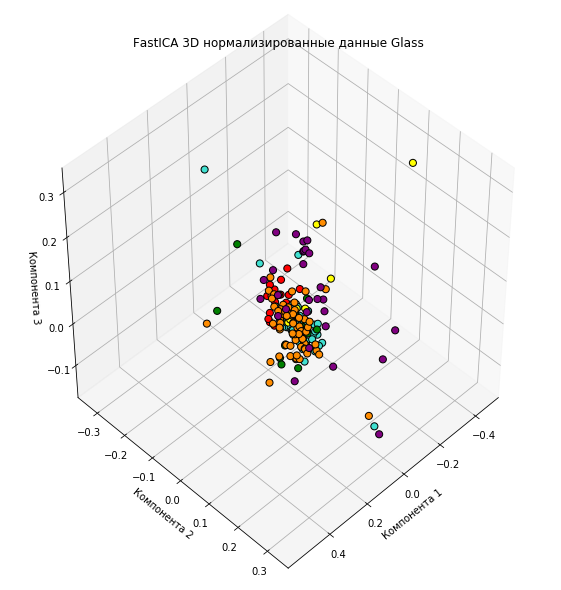

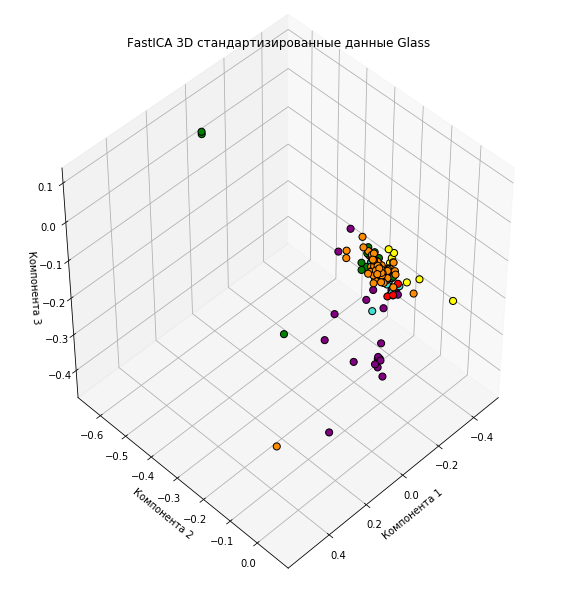

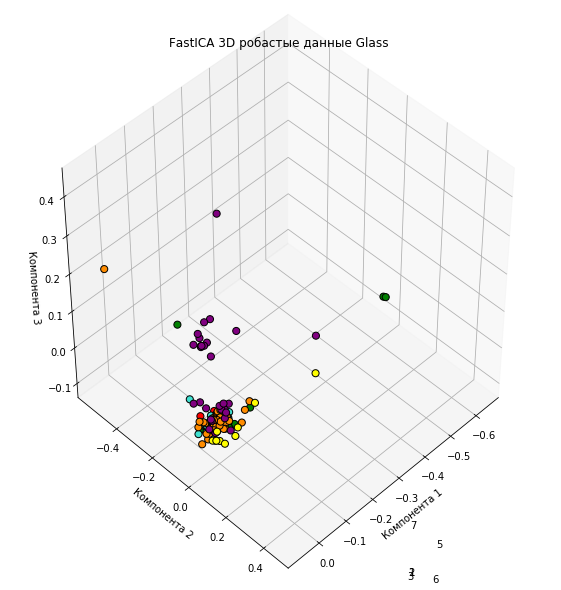

In [93]:
Raspl_data (Introduc_data_ica,0,1, "FastICA вводные Class данные", "Компонента 1 ", "Компонента 2")
Raspl_data (Norm_data_ica,0,1, "FastICA нормализированные Class данные", "Компонента 1 ", "Компонента 2")
Raspl_data (Stand_data_ica,0,1, "FastICA стандартизированные Class данные", "Компонента 1 ", "Компонента 2")
Raspl_data (Robust_data_ica,0,1, "FastICA робастые Class данные", "Компонента 1 ", "Компонента 2")
threeD_data (Introduc_data_ica , 45, 45, 0,1,2, "FastICA 3D вводные данные Glass ","Компонента 1 ", "Компонента 2", "Компонента 3")
threeD_data (Norm_data_ica , 45, 45, 0,1,2, "FastICA 3D нормализированные данные Glass ","Компонента 1 ", "Компонента 2", "Компонента 3")
threeD_data (Stand_data_ica , 45, 45, 0,1,2, "FastICA 3D стандартизированные данные Glass ","Компонента 1 ", "Компонента 2", "Компонента 3")
threeD_data (Robust_data_ica , 45, 45, 0,1,2, "FastICA 3D робастые данные Glass ","Компонента 1 ", "Компонента 2", "Компонента 3")

Алгорит не смог отделить даже класс 7 

Попробуем использовать следующий метод и посмотрим, что получится

# Алгоритм t-SNE

Даный алгоритм t-SNE, создают новое представление обучающих данных, но при этом не осуществляет преобразования новых данных. Таким образом попробуем визуализировать разделение данных на 2d плоскости

In [95]:
def Metod_TSNE (Neobrab_data):
    tsne= TSNE(random_state=0)
    Introduc_data_tsne = tsne.fit_transform(Neobrab_data) 
    return Introduc_data_tsne

In [96]:
Introduc_data_tsne=Metod_TSNE(Neobrab_data_NoType)
Norm_data_tsne=Metod_TSNE(Norm_data_NoType)
Stand_data_tsne=Metod_TSNE(Stand_data_NoType)
Robust_data_tsne=Metod_TSNE(Robust_data_NoType)

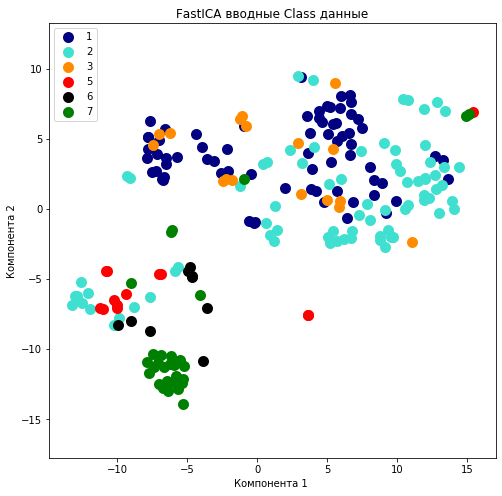

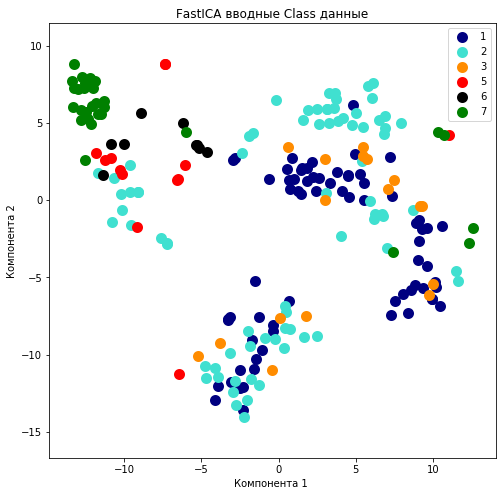

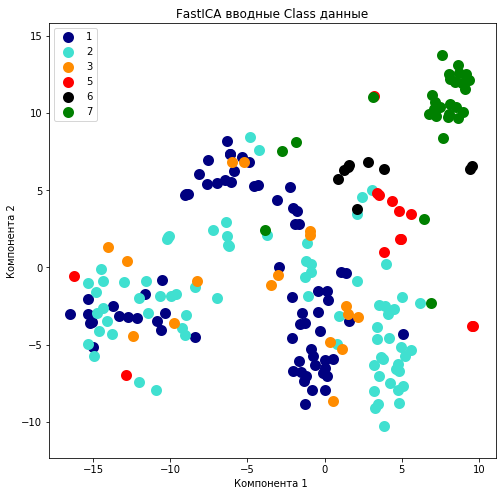

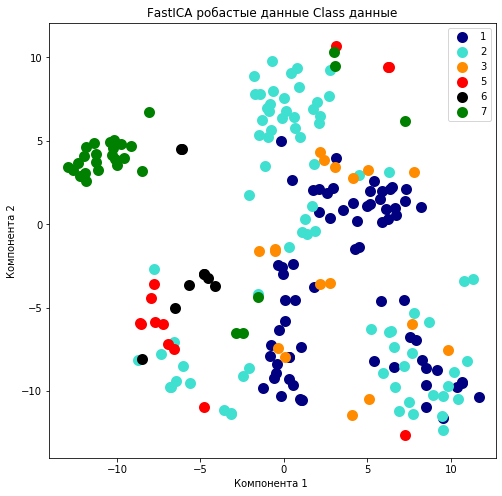

In [98]:
Raspl_data (Introduc_data_tsne,0,1, "FastICA вводные Class данные", "Компонента 1 ", "Компонента 2")
Raspl_data (Norm_data_tsne,0,1, "FastICA вводные Class данные", "Компонента 1 ", "Компонента 2")
Raspl_data (Stand_data_tsne,0,1, "FastICA вводные Class данные", "Компонента 1 ", "Компонента 2")
Raspl_data (Robust_data_tsne,0,1, "FastICA робастые данные Class данные", "Компонента 1 ", "Компонента 2")

Мы видим, что данные разбиваются. Конечно, не идеально, но модели смогут отделять данные 

# Общий пакет данных 

Ниже приведены все данные которые были проанализированы



Обычные данные 

In [102]:
Neobrab_data_NoType
Stand_data_NoType
Norm_data_NoType
Robust_data_NoType

array([[ 1.26375712,  0.37057221,  0.68013468, ...,  0.16085791,
         0.        ,  0.        ],
       [-0.02656546,  0.64305177,  0.08080808, ..., -0.82573727,
         0.        ,  0.        ],
       [-0.56925996,  0.2506812 ,  0.04713805, ..., -0.87935657,
         0.        ,  0.        ],
       ...,
       [ 1.12713472,  1.15531335, -2.34343434, ..., -0.17158177,
         1.64      ,  0.        ],
       [-0.44402277,  1.17711172, -2.34343434, ..., -0.12868633,
         1.57      ,  0.        ],
       [-0.21631879,  1.01362398, -2.34343434, ...,  0.02144772,
         1.67      ,  0.        ]])

PCA данные 

In [103]:
Introduc_data_pca = Metod_PCA(Neobrab_data_NoType,9)
Norm_data_pca = Metod_PCA(Norm_data_NoType,9)
Stand_data_pca = Metod_PCA(Stand_data_NoType,9)
Robust_data_pca = Metod_PCA(Robust_data_NoType,9)

[4.76205247e-01 2.63192760e-01 1.07800432e-01 1.02024637e-01
 3.30672372e-02 1.60477360e-02 1.42743130e-03 2.34365001e-04
 1.53917702e-07]
[2.52869126e+01 1.87990408e+01 1.20312007e+01 1.17044564e+01
 6.66342748e+00 4.64200502e+00 1.38444698e+00 5.60977056e-01
 1.43761635e-02]
[4.54295689e-01 1.79900973e-01 1.26494594e-01 9.79784747e-02
 6.86239844e-02 4.21410072e-02 2.60979021e-02 4.32796192e-03
 1.39413736e-04]
[5.1049308  3.21245688 2.69374532 2.3707507  1.98407697 1.55479454
 1.22355459 0.49826716 0.08942796]
[2.79018192e-01 2.27785798e-01 1.56093777e-01 1.28651383e-01
 1.01555805e-01 5.86261325e-02 4.09953826e-02 7.09477197e-03
 1.78757536e-04]
[23.18165303 20.94553527 17.33887582 15.74111062 13.98558118 10.62609671
  8.88578116  3.69655662  0.58675976]
[3.84958760e-01 1.86380690e-01 1.69922187e-01 1.02268553e-01
 8.44030338e-02 4.48811209e-02 2.01397584e-02 6.88496317e-03
 1.60934523e-04]
[29.46361639 20.5012058  19.57510013 15.18623106 13.79615219 10.06029684
  6.7391648   3.940

NMF данные 

In [104]:
Introduc_data_nmf=Metod_NMF(Neobrab_data_NoType,9)
Norm_data_nmf=Metod_NMF(Norm_data_NoType,9)

FactorAnalysis данные 

In [105]:
Introduc_data_Factor=Metod_FactorAnalysis(Neobrab_data_NoType,9)
Norm_data_Factor=Metod_FactorAnalysis(Norm_data_NoType,9)
Stand_data_Factor=Metod_FactorAnalysis(Stand_data_NoType,9) 
Robust_data_Factor=Metod_FactorAnalysis(Robust_data_NoType,9)

Kernel PCA данные 

In [106]:
Introduc_data_kpc=Metod_KernelPCA(Neobrab_data_NoType,9)
Norm_data_kpc=Metod_KernelPCA(Norm_data_NoType,9)
Stand_data_kpc=Metod_KernelPCA(Stand_data_NoType,9)
Robust_data_kpc=Metod_KernelPCA(Robust_data_NoType,9)

[36.8867858  16.80528197 12.01461212  8.61300907  7.11545984  4.84726052
  4.35052412  4.29772538  3.72356096]
[18.71331066  6.43452097  5.34780005  3.64702877  2.50090134  1.71257083
  1.42755011  0.8452503   0.67184179]
[28.49032201 11.97478071 10.66113285  8.15668321  6.94235133  5.49768131
  5.40788827  4.96879947  4.52461359]
[26.98656587 11.04315938 10.22744762  8.86410796  7.55785907  5.2046381
  5.00879287  4.61543874  4.37327374]


FastICA данные 

In [107]:
Introduc_data_ica=Metod_FastICA(Neobrab_data_NoType,9)
Norm_data_ica=Metod_FastICA(Norm_data_NoType,9)
Stand_data_ica=Metod_FastICA(Stand_data_NoType,9)
Robust_data_ica=Metod_FastICA(Robust_data_NoType,9)

t-SNE данные 

In [108]:
Introduc_data_tsne=Metod_TSNE(Neobrab_data_NoType)
Norm_data_tsne=Metod_TSNE(Norm_data_NoType)
Stand_data_tsne=Metod_TSNE(Stand_data_NoType)
Robust_data_tsne=Metod_TSNE(Robust_data_NoType)

# Конечная обработка данных 

Итого 26 вариаций 

Исключим FastICA данные, FactorAnalysis данные, NMF данные, так как по графическим изображениям не очевидно, что они разделяют классы 

Остальные данные оставим, чтобы сравнить какая модель на каких данных лучше обучается

Обычные данные

In [109]:
Neobrab_data_NoType
Stand_data_NoType
Norm_data_NoType
Robust_data_NoType

array([[ 1.26375712,  0.37057221,  0.68013468, ...,  0.16085791,
         0.        ,  0.        ],
       [-0.02656546,  0.64305177,  0.08080808, ..., -0.82573727,
         0.        ,  0.        ],
       [-0.56925996,  0.2506812 ,  0.04713805, ..., -0.87935657,
         0.        ,  0.        ],
       ...,
       [ 1.12713472,  1.15531335, -2.34343434, ..., -0.17158177,
         1.64      ,  0.        ],
       [-0.44402277,  1.17711172, -2.34343434, ..., -0.12868633,
         1.57      ,  0.        ],
       [-0.21631879,  1.01362398, -2.34343434, ...,  0.02144772,
         1.67      ,  0.        ]])

PCA данные

In [110]:
Introduc_data_pca = Metod_PCA(Neobrab_data_NoType,9)
Norm_data_pca = Metod_PCA(Norm_data_NoType,9)
Stand_data_pca = Metod_PCA(Stand_data_NoType,9)
Robust_data_pca = Metod_PCA(Robust_data_NoType,9)

[4.76205247e-01 2.63192760e-01 1.07800432e-01 1.02024637e-01
 3.30672372e-02 1.60477360e-02 1.42743130e-03 2.34365001e-04
 1.53917702e-07]
[2.52869126e+01 1.87990408e+01 1.20312007e+01 1.17044564e+01
 6.66342748e+00 4.64200502e+00 1.38444698e+00 5.60977056e-01
 1.43761635e-02]
[4.54295689e-01 1.79900973e-01 1.26494594e-01 9.79784747e-02
 6.86239844e-02 4.21410072e-02 2.60979021e-02 4.32796192e-03
 1.39413736e-04]
[5.1049308  3.21245688 2.69374532 2.3707507  1.98407697 1.55479454
 1.22355459 0.49826716 0.08942796]
[2.79018192e-01 2.27785798e-01 1.56093777e-01 1.28651383e-01
 1.01555805e-01 5.86261325e-02 4.09953826e-02 7.09477197e-03
 1.78757536e-04]
[23.18165303 20.94553527 17.33887582 15.74111062 13.98558118 10.62609671
  8.88578116  3.69655662  0.58675976]
[3.84958760e-01 1.86380690e-01 1.69922187e-01 1.02268553e-01
 8.44030338e-02 4.48811209e-02 2.01397584e-02 6.88496317e-03
 1.60934523e-04]
[29.46361639 20.5012058  19.57510013 15.18623106 13.79615219 10.06029684
  6.7391648   3.940

В Introduc_data_pca оставим 5 компонент, остальные несут минимальную информацию. 

В Norm_data_pca оставим 5 компонент, остальные несут минимальную информацию.

В Stand_data_pca оставим 5 компонент, остальные несут минимальную информацию.

Robust_data_pca оставим 5 компонент, остальные несут минимальную информацию.

Примерно 90 процентов информации сохраняется 

In [111]:
Introduc_data_pca = Metod_PCA(Neobrab_data_NoType,5)
Norm_data_pca = Metod_PCA(Norm_data_NoType,5)
Stand_data_pca = Metod_PCA(Stand_data_NoType,5)
Robust_data_pca = Metod_PCA(Robust_data_NoType,5)

[0.47620525 0.26319276 0.10780043 0.10202464 0.03306724]
[25.28691265 18.79904076 12.03120066 11.70445645  6.66342748]
[0.45429569 0.17990097 0.12649459 0.09797847 0.06862398]
[5.1049308  3.21245688 2.69374532 2.3707507  1.98407697]
[0.27901819 0.2277858  0.15609378 0.12865138 0.10155581]
[23.18165303 20.94553527 17.33887582 15.74111062 13.98558118]
[0.38495876 0.18638069 0.16992219 0.10226855 0.08440303]
[29.46361639 20.5012058  19.57510013 15.18623106 13.79615219]


Kernel PCA данные

In [112]:
Introduc_data_kpc=Metod_KernelPCA(Neobrab_data_NoType,9)
Norm_data_kpc=Metod_KernelPCA(Norm_data_NoType,9)
Stand_data_kpc=Metod_KernelPCA(Stand_data_NoType,9)
Robust_data_kpc=Metod_KernelPCA(Robust_data_NoType,9)

[36.8867858  16.80528197 12.01461212  8.61300907  7.11545984  4.84726052
  4.35052412  4.29772538  3.72356096]
[18.71331066  6.43452097  5.34780005  3.64702877  2.50090134  1.71257083
  1.42755011  0.8452503   0.67184179]
[28.49032201 11.97478071 10.66113285  8.15668321  6.94235133  5.49768131
  5.40788827  4.96879947  4.52461359]
[26.98656587 11.04315938 10.22744762  8.86410796  7.55785907  5.2046381
  5.00879287  4.61543874  4.37327374]


Так же можно везде оставить по 5 компонент 

In [113]:
Introduc_data_kpc=Metod_KernelPCA(Neobrab_data_NoType,5)
Norm_data_kpc=Metod_KernelPCA(Norm_data_NoType,5)
Stand_data_kpc=Metod_KernelPCA(Stand_data_NoType,5)
Robust_data_kpc=Metod_KernelPCA(Robust_data_NoType,5)

[36.8867858  16.80528197 12.01461212  8.61300907  7.11545984]
[18.71331066  6.43452097  5.34780005  3.64702877  2.50090134]
[28.49032201 11.97478071 10.66113285  8.15668321  6.94235133]
[26.98656587 11.04315938 10.22744762  8.86410796  7.55785907]


t-SNE данные

In [114]:
Introduc_data_tsne=Metod_TSNE(Neobrab_data_NoType)
Norm_data_tsne=Metod_TSNE(Norm_data_NoType)
Stand_data_tsne=Metod_TSNE(Stand_data_NoType)
Robust_data_tsne=Metod_TSNE(Robust_data_NoType)

t-SNE данные двухмерны, тут нечего убирать 

# Обучение моделей

In [49]:
from sklearn import svm, metrics, linear_model, neural_network
from sklearn.neighbors import KNeighborsClassifier

In [50]:
Kachestvo_Models=[]

In [51]:
def Obuchenie( clf, data, y, k, Nazvanie ):
    n = data.shape[0]
    prognoz_sum=0
    for i in range(k):
        perm = np.random.permutation( n )
        tr_n = int(0.85 * n)
        train = perm[ :tr_n ]
        valid = perm[ tr_n: ]
        train_dig = data[ train ]
        train_lab = y[ train ]
        valid_dig = data[ valid ]
        valid_lab = y[ valid ]
        clf.fit( train_dig, train_lab )
        prognoz=sum( clf.predict( valid_dig ) == valid_lab )/valid_lab.shape[0]
        prognoz_sum+=prognoz
    print(Nazvanie, "=",prognoz_sum/k)
    return prognoz_sum/k

In [52]:
clf = svm.SVC( kernel = 'rbf', gamma=1 , C=10)
Tochnost=Obuchenie( clf, Neobrab_data_NoType, y, 1000, "Вводные данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Stand_data_NoType, y, 1000, "Стандартизированные данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Norm_data_NoType, y, 1000, "Нормализированные данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Robust_data_NoType, y, 1000, "Робастые данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Introduc_data_pca, y, 1000, "Вводные pca данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Norm_data_pca, y, 1000, "Нормализированные pca данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Stand_data_pca, y, 1000, "Стандартизированные pca данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Robust_data_pca, y, 1000, "Робастые pca данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Introduc_data_kpc, y, 1000, "Вводные kpc данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Norm_data_kpc, y, 1000, "Нормализированные kpc данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Stand_data_kpc, y, 1000, "Стандартизированные kpc данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Robust_data_kpc, y, 1000, "Робастые kpc данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Introduc_data_tsne, y, 1000, "Вводные tsne данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Norm_data_tsne, y, 1000, "Нормализированные tsne данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Stand_data_tsne, y, 1000, "Стандартизированные tsne данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Robust_data_tsne, y, 1000, "Робастые tsne данные")
Kachestvo_Models.append(Tochnost)

Вводные данные = 0.7212121212121213
Стандартизированные данные = 0.6848484848484849
Нормализированные данные = 0.6757575757575759
Робастые данные = 0.6454545454545456
Вводные pca данные = 0.7393939393939395
Нормализированные pca данные = 0.6454545454545455
Стандартизированные pca данные = 0.6363636363636365
Робастые pca данные = 0.6393939393939394
Вводные kpc данные = 0.6000000000000001
Нормализированные kpc данные = 0.6818181818181819
Стандартизированные kpc данные = 0.6060606060606062
Робастые kpc данные = 0.6303030303030305
Вводные tsne данные = 0.696969696969697
Нормализированные tsne данные = 0.6636363636363636
Стандартизированные tsne данные = 0.7363636363636366
Робастые tsne данные = 0.6575757575757576


Видим, что разброс обучения по данным значительный, но лучше всего модель обучается на "вводных данных" и на "вводные pca данные"

In [53]:
clf = linear_model.SGDClassifier()
Tochnost=Obuchenie( clf, Neobrab_data_NoType, y, 1000, "Вводные данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Stand_data_NoType, y, 1000, "Стандартизированные данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Norm_data_NoType, y, 1000, "Нормализированные данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Robust_data_NoType, y, 1000, "Робастые данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Introduc_data_pca, y, 1000, "Вводные pca данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Norm_data_pca, y, 1000, "Нормализированные pca данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Stand_data_pca, y, 1000, "Стандартизированные pca данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Robust_data_pca, y, 1000, "Робастые pca данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Introduc_data_kpc, y, 1000, "Вводные kpc данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Norm_data_kpc, y, 1000, "Нормализированные kpc данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Stand_data_kpc, y, 1000, "Стандартизированные kpc данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Robust_data_kpc, y, 1000, "Робастые kpc данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Introduc_data_tsne, y, 1000, "Вводные tsne данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Norm_data_tsne, y, 1000, "Нормализированные tsne данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Stand_data_tsne, y, 1000, "Стандартизированные tsne данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Robust_data_tsne, y, 1000, "Робастые tsne данные")
Kachestvo_Models.append(Tochnost)

Вводные данные = 0.296969696969697
Стандартизированные данные = 0.5393939393939394
Нормализированные данные = 0.49393939393939396
Робастые данные = 0.5121212121212121
Вводные pca данные = 0.506060606060606
Нормализированные pca данные = 0.4878787878787878
Стандартизированные pca данные = 0.5
Робастые pca данные = 0.4696969696969697
Вводные kpc данные = 0.584848484848485
Нормализированные kpc данные = 0.596969696969697
Стандартизированные kpc данные = 0.5727272727272728
Робастые kpc данные = 0.5303030303030303
Вводные tsne данные = 0.40909090909090906
Нормализированные tsne данные = 0.3787878787878788
Стандартизированные tsne данные = 0.4
Робастые tsne данные = 0.3939393939393939


Видим, что разброс обучения по данным значительный. Модель обучилась намного хуже чем в предыдущей модели.

In [55]:
from sklearn import tree
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [56]:
clf = DecisionTreeClassifier(max_depth=10)
Tochnost=Obuchenie( clf, Neobrab_data_NoType, y, 1000, "Вводные данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Stand_data_NoType, y, 1000, "Стандартизированные данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Norm_data_NoType, y, 1000, "Нормализированные данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Robust_data_NoType, y, 1000, "Робастые данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Introduc_data_pca, y, 1000, "Вводные pca данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Norm_data_pca, y, 1000, "Нормализированные pca данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Stand_data_pca, y, 1000, "Стандартизированные pca данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Robust_data_pca, y, 1000, "Робастые pca данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Introduc_data_kpc, y, 1000, "Вводные kpc данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Norm_data_kpc, y, 1000, "Нормализированные kpc данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Stand_data_kpc, y, 1000, "Стандартизированные kpc данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Robust_data_kpc, y, 1000, "Робастые kpc данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Introduc_data_tsne, y, 1000, "Вводные tsne данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Norm_data_tsne, y, 1000, "Нормализированные tsne данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Stand_data_tsne, y, 1000, "Стандартизированные tsne данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Robust_data_tsne, y, 1000, "Робастые tsne данные")
Kachestvo_Models.append(Tochnost)

Вводные данные = 0.6696969696969697
Стандартизированные данные = 0.6636363636363637
Нормализированные данные = 0.6545454545454545
Робастые данные = 0.6848484848484849
Вводные pca данные = 0.7090909090909091
Нормализированные pca данные = 0.6333333333333334
Стандартизированные pca данные = 0.6515151515151516
Робастые pca данные = 0.6939393939393941
Вводные kpc данные = 0.6030303030303031
Нормализированные kpc данные = 0.6242424242424244
Стандартизированные kpc данные = 0.5363636363636363
Робастые kpc данные = 0.5787878787878789
Вводные tsne данные = 0.6484848484848487
Нормализированные tsne данные = 0.6090909090909091
Стандартизированные tsne данные = 0.6575757575757576
Робастые tsne данные = 0.675757575757576


Диссперсия обучения стабилизировалась. На "вводных pca данных" модель даёт лучше результаты, чем на остальных данных 

In [57]:
clf = KNeighborsClassifier(n_neighbors=3)
Tochnost=Obuchenie( clf, Neobrab_data_NoType, y, 1000, "Вводные данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Stand_data_NoType, y, 1000, "Стандартизированные данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Norm_data_NoType, y, 1000, "Нормализированные данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Robust_data_NoType, y, 1000, "Робастые данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Introduc_data_pca, y, 1000, "Вводные pca данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Norm_data_pca, y, 1000, "Нормализированные pca данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Stand_data_pca, y, 1000, "Стандартизированные pca данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Robust_data_pca, y, 1000, "Робастые pca данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Introduc_data_kpc, y, 1000, "Вводные kpc данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Norm_data_kpc, y, 1000, "Нормализированные kpc данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Stand_data_kpc, y, 1000, "Стандартизированные kpc данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Robust_data_kpc, y, 1000, "Робастые kpc данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Introduc_data_tsne, y, 1000, "Вводные tsne данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Norm_data_tsne, y, 1000, "Нормализированные tsne данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Stand_data_tsne, y, 1000, "Стандартизированные tsne данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Robust_data_tsne, y, 1000, "Робастые tsne данные")
Kachestvo_Models.append(Tochnost)

Вводные данные = 0.6727272727272728
Стандартизированные данные = 0.693939393939394
Нормализированные данные = 0.690909090909091
Робастые данные = 0.7121212121212122
Вводные pca данные = 0.7151515151515153
Нормализированные pca данные = 0.6696969696969698
Стандартизированные pca данные = 0.6696969696969697
Робастые pca данные = 0.7333333333333334
Вводные kpc данные = 0.6060606060606061
Нормализированные kpc данные = 0.7242424242424244
Стандартизированные kpc данные = 0.6727272727272728
Робастые kpc данные = 0.6515151515151516
Вводные tsne данные = 0.6575757575757577
Нормализированные tsne данные = 0.6727272727272728
Стандартизированные tsne данные = 0.6696969696969697
Робастые tsne данные = 0.7030303030303032


Модель на "Вводные pca данные" и "Робастые pca данные" показывает лучшие результаты

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
clf=RandomForestClassifier(n_estimators=25, random_state=0)
Tochnost=Obuchenie( clf, Neobrab_data_NoType, y, 1000, "Вводные данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Stand_data_NoType, y, 1000, "Стандартизированные данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Norm_data_NoType, y, 1000, "Нормализированные данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Robust_data_NoType, y, 1000, "Робастые данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Introduc_data_pca, y, 1000, "Вводные pca данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Norm_data_pca, y, 1000, "Нормализированные pca данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Stand_data_pca, y, 1000, "Стандартизированные pca данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Robust_data_pca, y, 1000, "Робастые pca данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Introduc_data_kpc, y, 1000, "Вводные kpc данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Norm_data_kpc, y, 1000, "Нормализированные kpc данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Stand_data_kpc, y, 1000, "Стандартизированные kpc данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Robust_data_kpc, y, 1000, "Робастые kpc данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Introduc_data_tsne, y, 1000, "Вводные tsne данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Norm_data_tsne, y, 1000, "Нормализированные tsne данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Stand_data_tsne, y, 1000, "Стандартизированные tsne данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Robust_data_tsne, y, 1000, "Робастые tsne данные")
Kachestvo_Models.append(Tochnost)

Вводные данные = 0.7727272727272728
Стандартизированные данные = 0.7606060606060607
Нормализированные данные = 0.7454545454545456
Робастые данные = 0.7575757575757577
Вводные pca данные = 0.7030303030303032
Нормализированные pca данные = 0.7121212121212123
Стандартизированные pca данные = 0.7030303030303031
Робастые pca данные = 0.7181818181818184
Вводные kpc данные = 0.6696969696969697
Нормализированные kpc данные = 0.7151515151515153
Стандартизированные kpc данные = 0.5757575757575758
Робастые kpc данные = 0.681818181818182
Вводные tsne данные = 0.7030303030303032
Нормализированные tsne данные = 0.7121212121212122
Стандартизированные tsne данные = 0.6515151515151516
Робастые tsne данные = 0.7060606060606063


Мы видим, что это модель даёт лучшие результаты из всех моделей. При это она дает эти результаты на необработанных данных.

In [60]:
from sklearn.neural_network import MLPClassifier

In [61]:
clf = neural_network.MLPClassifier( )
Tochnost=Obuchenie( clf, Neobrab_data_NoType, y, 1000, "Вводные данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Stand_data_NoType, y, 1000, "Стандартизированные данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Norm_data_NoType, y, 1000, "Нормализированные данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Robust_data_NoType, y, 1000, "Робастые данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Introduc_data_pca, y, 1000, "Вводные pca данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Norm_data_pca, y, 1000, "Нормализированные pca данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Stand_data_pca, y, 1000, "Стандартизированные pca данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Robust_data_pca, y, 1000, "Робастые pca данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Introduc_data_kpc, y, 1000, "Вводные kpc данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Norm_data_kpc, y, 1000, "Нормализированные kpc данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Stand_data_kpc, y, 1000, "Стандартизированные kpc данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Robust_data_kpc, y, 1000, "Робастые kpc данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Introduc_data_tsne, y, 1000, "Вводные tsne данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Norm_data_tsne, y, 1000, "Нормализированные tsne данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Stand_data_tsne, y, 1000, "Стандартизированные tsne данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Robust_data_tsne, y, 1000, "Робастые tsne данные")
Kachestvo_Models.append(Tochnost)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

Вводные данные = 0.4242424242424242


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

Стандартизированные данные = 0.7212121212121213


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

Нормализированные данные = 0.5636363636363637


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

Робастые данные = 0.6515151515151516


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

Вводные pca данные = 0.7121212121212122


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

Нормализированные pca данные = 0.6363636363636365


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

Стандартизированные pca данные = 0.7151515151515152


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

Робастые pca данные = 0.7181818181818183


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

Вводные kpc данные = 0.6454545454545455


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

Нормализированные kpc данные = 0.587878787878788


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

Стандартизированные kpc данные = 0.6060606060606062


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

Робастые kpc данные = 0.6090909090909091


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

Вводные tsne данные = 0.6454545454545456


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

Нормализированные tsne данные = 0.6090909090909091


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

Стандартизированные tsne данные = 0.5424242424242424


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

Робастые tsne данные = 0.6787878787878789


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Нейросеть выдает наилучшие результаты на "Стандартизированные pca данные" и на "Робастые pca данные"

In [62]:
from sklearn.ensemble import GradientBoostingClassifier 

In [63]:
clf=GradientBoostingClassifier(n_estimators=30, random_state=0, max_depth=15,learning_rate=0.2)
Tochnost=Obuchenie( clf, Neobrab_data_NoType, y, 1000, "Вводные данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Stand_data_NoType, y, 1000, "Стандартизированные данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Norm_data_NoType, y, 1000, "Нормализированные данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Robust_data_NoType, y, 1000, "Робастые данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Introduc_data_pca, y, 1000, "Вводные pca данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Norm_data_pca, y, 1000, "Нормализированные pca данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Stand_data_pca, y, 1000, "Стандартизированные pca данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Robust_data_pca, y, 1000, "Робастые pca данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Introduc_data_kpc, y, 1000, "Вводные kpc данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Norm_data_kpc, y, 1000, "Нормализированные kpc данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Stand_data_kpc, y, 1000, "Стандартизированные kpc данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Robust_data_kpc, y, 1000, "Робастые kpc данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Introduc_data_tsne, y, 1000, "Вводные tsne данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Norm_data_tsne, y, 1000, "Нормализированные tsne данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Stand_data_tsne, y, 1000, "Стандартизированные tsne данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Robust_data_tsne, y, 1000, "Робастые tsne данные")
Kachestvo_Models.append(Tochnost)

Вводные данные = 0.7090909090909092
Стандартизированные данные = 0.7030303030303031
Нормализированные данные = 0.6787878787878789
Робастые данные = 0.6878787878787881
Вводные pca данные = 0.6484848484848487
Нормализированные pca данные = 0.5939393939393939
Стандартизированные pca данные = 0.6636363636363638
Робастые pca данные = 0.6787878787878789
Вводные kpc данные = 0.5878787878787879
Нормализированные kpc данные = 0.6454545454545455
Стандартизированные kpc данные = 0.6363636363636365
Робастые kpc данные = 0.6363636363636365
Вводные tsne данные = 0.6606060606060608
Нормализированные tsne данные = 0.6393939393939394
Стандартизированные tsne данные = 0.6818181818181819
Робастые tsne данные = 0.6424242424242425


Наилучшие результаты на "Стандартизированные данные " и на "Вводные данные"

In [64]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [65]:
clf=LinearDiscriminantAnalysis()
Tochnost=Obuchenie( clf, Neobrab_data_NoType, y, 1000, "Вводные данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Stand_data_NoType, y, 1000, "Стандартизированные данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Norm_data_NoType, y, 1000, "Нормализированные данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Robust_data_NoType, y, 1000, "Робастые данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Introduc_data_pca, y, 1000, "Вводные pca данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Norm_data_pca, y, 1000, "Нормализированные pca данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Stand_data_pca, y, 1000, "Стандартизированные pca данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Robust_data_pca, y, 1000, "Робастые pca данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Introduc_data_kpc, y, 1000, "Вводные kpc данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Norm_data_kpc, y, 1000, "Нормализированные kpc данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Stand_data_kpc, y, 1000, "Стандартизированные kpc данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Robust_data_kpc, y, 1000, "Робастые kpc данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Introduc_data_tsne, y, 1000, "Вводные tsne данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Norm_data_tsne, y, 1000, "Нормализированные tsne данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Stand_data_tsne, y, 1000, "Стандартизированные tsne данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Robust_data_tsne, y, 1000, "Робастые tsne данные")
Kachestvo_Models.append(Tochnost)

Вводные данные = 0.587878787878788
Стандартизированные данные = 0.5878787878787879
Нормализированные данные = 0.6363636363636365
Робастые данные = 0.6666666666666667
Вводные pca данные = 0.590909090909091
Нормализированные pca данные = 0.5787878787878789
Стандартизированные pca данные = 0.5575757575757574
Робастые pca данные = 0.5787878787878789
Вводные kpc данные = 0.6393939393939394
Нормализированные kpc данные = 0.5454545454545454
Стандартизированные kpc данные = 0.587878787878788
Робастые kpc данные = 0.6272727272727273
Вводные tsne данные = 0.5
Нормализированные tsne данные = 0.38181818181818183
Стандартизированные tsne данные = 0.40606060606060607
Робастые tsne данные = 0.6303030303030305


Плохие результаты, сильно отличаются от результатов предыдущих моделей 

In [66]:
clf=GaussianNB()
Tochnost=Obuchenie( clf, Neobrab_data_NoType, y, 1000, "Вводные данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Stand_data_NoType, y, 1000, "Стандартизированные данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Norm_data_NoType, y, 1000, "Нормализированные данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Robust_data_NoType, y, 1000, "Робастые данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Introduc_data_pca, y, 1000, "Вводные pca данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Norm_data_pca, y, 1000, "Нормализированные pca данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Stand_data_pca, y, 1000, "Стандартизированные pca данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Robust_data_pca, y, 1000, "Робастые pca данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Introduc_data_kpc, y, 1000, "Вводные kpc данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Norm_data_kpc, y, 1000, "Нормализированные kpc данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Stand_data_kpc, y, 1000, "Стандартизированные kpc данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Robust_data_kpc, y, 1000, "Робастые kpc данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Introduc_data_tsne, y, 1000, "Вводные tsne данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Norm_data_tsne, y, 1000, "Нормализированные tsne данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Stand_data_tsne, y, 1000, "Стандартизированные tsne данные")
Kachestvo_Models.append(Tochnost)
Tochnost=Obuchenie( clf, Robust_data_tsne, y, 1000, "Робастые tsne данные")
Kachestvo_Models.append(Tochnost)

Вводные данные = 0.3727272727272727
Стандартизированные данные = 0.49393939393939396
Нормализированные данные = 0.4666666666666668
Робастые данные = 0.396969696969697
Вводные pca данные = 0.5484848484848485
Нормализированные pca данные = 0.5242424242424242
Стандартизированные pca данные = 0.4818181818181818
Робастые pca данные = 0.5333333333333334
Вводные kpc данные = 0.5666666666666667
Нормализированные kpc данные = 0.5515151515151515
Стандартизированные kpc данные = 0.6727272727272728
Робастые kpc данные = 0.6484848484848487
Вводные tsne данные = 0.5272727272727271
Нормализированные tsne данные = 0.5030303030303032
Стандартизированные tsne данные = 0.5272727272727271
Робастые tsne данные = 0.5636363636363637


Результаты плохие, хуже чем в других моделях 

# Наилучшая модель 

In [67]:
from copy import deepcopy
Nomer=range(1,len(Kachestvo_Models)+1)
Spicok_copy=deepcopy(Kachestvo_Models)
#Копировать пришлось из за того, что последующая сортировка в MNK.Spicok привела к сортировке в других кодых 
#где находится переменная MNK.Spicok
LL=list(zip(Nomer,Kachestvo_Models))
Slovar = dict(LL)
xx = list( Slovar.items() )
Spicok_copy.sort()
lychaya_model=list(zip(Nomer, Spicok_copy))
Model=dict()
list(map( lambda x: Model.setdefault(x[1],x[0]), xx))
CAR=Model[lychaya_model[-1][1]]
f'НАИЛУЧШАЯ МОДЕЛЬ С ТОЧКИ ЗРЕНИЯ МАШИННОГО ОБУЧЕНИЯ ПОД НОМЕРОМ {CAR}.'

'НАИЛУЧШАЯ МОДЕЛЬ С ТОЧКИ ЗРЕНИЯ МАШИННОГО ОБУЧЕНИЯ ПОД НОМЕРОМ 65.'